### Importing libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary
import importlib

### Data transforms

In [2]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

### Loading Dataset

In [3]:
train = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

### Data statistics

In [4]:
train_data = train.train_data.numpy()
train_data = train.transform(train_data)
torch.min(train_data), torch.max(train_data), torch.mean(train_data), torch.std(train_data)

c:\Users\focusedmonk\anaconda3\envs\torch\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


(tensor(-0.4242), tensor(2.8215), tensor(-0.0001), tensor(1.0000))

### Data loader

In [5]:
seed = 1
cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

dataloader_cfgs = dict(batch_size=128, shuffle=True, num_workers=4, pin_memory=True) if cuda else dict(batch_size=128, shuffle=True)

# train & test dataloaders
def get_train_test_loaders(train=train, test=test):
    train_loader = torch.utils.data.DataLoader(train, **dataloader_cfgs)
    test_loader = torch.utils.data.DataLoader(test, **dataloader_cfgs)
    return train_loader, test_loader

train_loader, test_loader = get_train_test_loaders()

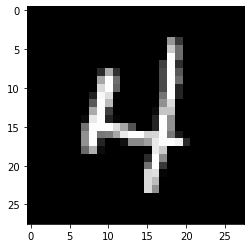

In [6]:
img, lbl = next(iter(train_loader))
plt.imshow(img[0].numpy().squeeze(), cmap='gray')

### Model 1

In [ ]:
# import importlib
# importlib.reload(module)

#### Model Architecture

In [7]:
from models.model_1 import Net_1
model_1 = Net_1().to(device)
summary(model_1, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
-------------------------------------

#### Model Training

In [19]:
num_epochs = 20
train_loader, test_loader = get_train_test_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_1.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_1.model_train(device, train_loader, criterion, optimizer)
    model_1.model_test(device, test_loader, criterion)  

EPOCH: 1


Train: Loss=0.08694694191217422 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:27<00:00, 17.25it/s]  



Test set: Average loss: 0.0282, Accuracy: 9900/10000 (99.00%), Accuracy Diff: 0.245

EPOCH: 2


Train: Loss=0.017128361389040947 Batch_id=468 Accuracy=99.40: 100%|██████████| 469/469 [00:26<00:00, 17.59it/s]  



Test set: Average loss: 0.0306, Accuracy: 9906/10000 (99.06%), Accuracy Diff: 0.3433

EPOCH: 3


Train: Loss=0.008829114958643913 Batch_id=468 Accuracy=99.60: 100%|██████████| 469/469 [00:25<00:00, 18.09it/s]  



Test set: Average loss: 0.0311, Accuracy: 9905/10000 (99.05%), Accuracy Diff: 0.5483

EPOCH: 4


Train: Loss=0.0024076884146779776 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:25<00:00, 18.28it/s] 



Test set: Average loss: 0.0396, Accuracy: 9889/10000 (98.89%), Accuracy Diff: 0.7933

EPOCH: 5


Train: Loss=0.014558264054358006 Batch_id=468 Accuracy=99.75: 100%|██████████| 469/469 [00:25<00:00, 18.49it/s]  



Test set: Average loss: 0.0241, Accuracy: 9926/10000 (99.26%), Accuracy Diff: 0.4933

EPOCH: 6


Train: Loss=0.005971841048449278 Batch_id=468 Accuracy=99.83: 100%|██████████| 469/469 [00:25<00:00, 18.38it/s]  



Test set: Average loss: 0.0298, Accuracy: 9921/10000 (99.21%), Accuracy Diff: 0.62

EPOCH: 7


Train: Loss=0.004475709050893784 Batch_id=468 Accuracy=99.85: 100%|██████████| 469/469 [00:25<00:00, 18.56it/s]  



Test set: Average loss: 0.0303, Accuracy: 9913/10000 (99.13%), Accuracy Diff: 0.72

EPOCH: 8


Train: Loss=0.01780565269291401 Batch_id=468 Accuracy=99.84: 100%|██████████| 469/469 [00:26<00:00, 17.69it/s]   



Test set: Average loss: 0.0314, Accuracy: 9921/10000 (99.21%), Accuracy Diff: 0.63

EPOCH: 9


Train: Loss=0.005272906739264727 Batch_id=468 Accuracy=99.85: 100%|██████████| 469/469 [00:26<00:00, 17.88it/s]  



Test set: Average loss: 0.0274, Accuracy: 9924/10000 (99.24%), Accuracy Diff: 0.6067

EPOCH: 10


Train: Loss=0.0013927154941484332 Batch_id=468 Accuracy=99.92: 100%|██████████| 469/469 [00:25<00:00, 18.09it/s] 



Test set: Average loss: 0.0286, Accuracy: 9927/10000 (99.27%), Accuracy Diff: 0.6483

EPOCH: 11


Train: Loss=0.042001452296972275 Batch_id=468 Accuracy=99.97: 100%|██████████| 469/469 [00:23<00:00, 19.60it/s]  



Test set: Average loss: 0.0258, Accuracy: 9934/10000 (99.34%), Accuracy Diff: 0.635

EPOCH: 12


Train: Loss=0.0022173291072249413 Batch_id=468 Accuracy=99.97: 100%|██████████| 469/469 [00:26<00:00, 17.71it/s] 



Test set: Average loss: 0.0399, Accuracy: 9915/10000 (99.15%), Accuracy Diff: 0.8167

EPOCH: 13


Train: Loss=2.6775911464937963e-05 Batch_id=468 Accuracy=99.99: 100%|██████████| 469/469 [00:23<00:00, 19.95it/s]



Test set: Average loss: 0.0311, Accuracy: 9933/10000 (99.33%), Accuracy Diff: 0.6583

EPOCH: 14


Train: Loss=0.00029332912527024746 Batch_id=468 Accuracy=99.99: 100%|██████████| 469/469 [00:23<00:00, 20.23it/s] 



Test set: Average loss: 0.0320, Accuracy: 9930/10000 (99.30%), Accuracy Diff: 0.6933

EPOCH: 15


Train: Loss=0.0007006928790360689 Batch_id=468 Accuracy=99.98: 100%|██████████| 469/469 [00:23<00:00, 20.23it/s] 



Test set: Average loss: 0.0329, Accuracy: 9932/10000 (99.32%), Accuracy Diff: 0.6617

EPOCH: 16


Train: Loss=1.9117585907224566e-05 Batch_id=468 Accuracy=99.98: 100%|██████████| 469/469 [00:23<00:00, 20.25it/s]



Test set: Average loss: 0.0313, Accuracy: 9935/10000 (99.35%), Accuracy Diff: 0.6283

EPOCH: 17


Train: Loss=9.844025953498203e-06 Batch_id=468 Accuracy=100.00: 100%|██████████| 469/469 [00:23<00:00, 20.04it/s] 



Test set: Average loss: 0.0321, Accuracy: 9929/10000 (99.29%), Accuracy Diff: 0.7067

EPOCH: 18


Train: Loss=1.6961938626991468e-06 Batch_id=468 Accuracy=100.00: 100%|██████████| 469/469 [00:26<00:00, 17.86it/s]



Test set: Average loss: 0.0320, Accuracy: 9929/10000 (99.29%), Accuracy Diff: 0.71

EPOCH: 19


Train: Loss=3.87671279895585e-05 Batch_id=468 Accuracy=100.00: 100%|██████████| 469/469 [00:28<00:00, 16.48it/s]  



Test set: Average loss: 0.0329, Accuracy: 9934/10000 (99.34%), Accuracy Diff: 0.66

EPOCH: 20


Train: Loss=1.3513866178982425e-05 Batch_id=468 Accuracy=100.00: 100%|██████████| 469/469 [00:30<00:00, 15.41it/s]



Test set: Average loss: 0.0336, Accuracy: 9931/10000 (99.31%), Accuracy Diff: 0.69



#### Visualization of accuracy and loss

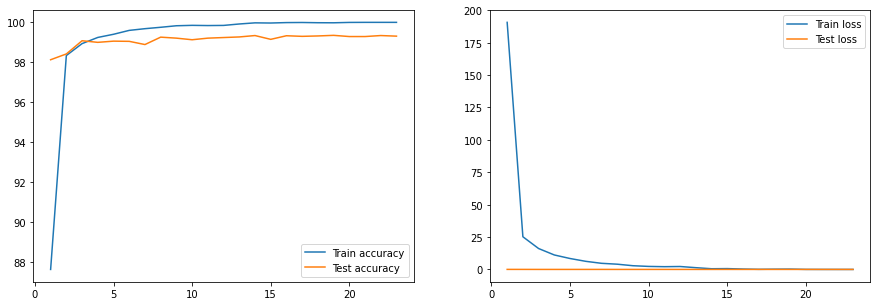

In [49]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_1.plot_accuracy()
plt.subplot(122)
model_1.plot_loss()
plt.savefig('images/model_1.png')
plt.show()

In [24]:
max(model_1.train_accuracy), max(model_1.test_accuracy)

(100.0, 99.35)

### Model 2

In [41]:
import importlib
import models.model_2 as model_2
importlib.reload(model_2)

<module 'models.model_2' from 'd:\\Self Learning\\TSAI\\TSAI\\S7\\models\\model_2.py'>

#### Model Architecture

In [42]:
from models.model_2 import Net_2
model_2 = Net_2().to(device)
summary(model_2, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
            Conv2d-3           [-1, 64, 24, 24]          18,432
              ReLU-4           [-1, 64, 24, 24]               0
            Conv2d-5          [-1, 128, 22, 22]          73,728
              ReLU-6          [-1, 128, 22, 22]               0
         MaxPool2d-7          [-1, 128, 11, 11]               0
            Conv2d-8           [-1, 32, 11, 11]           4,096
              ReLU-9           [-1, 32, 11, 11]               0
           Conv2d-10             [-1, 64, 9, 9]          18,432
             ReLU-11             [-1, 64, 9, 9]               0
           Conv2d-12            [-1, 128, 7, 7]          73,728
             ReLU-13            [-1, 128, 7, 7]               0
           Conv2d-14             [-1, 1

#### Model Training

In [43]:
num_epochs = 20
train_loader, test_loader = get_train_test_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_2.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_2.model_train(device, train_loader, criterion, optimizer)
    model_2.model_test(device, test_loader, criterion)  

EPOCH: 1


Train: Loss=0.20448602735996246 Batch_id=468 Accuracy=68.06: 100%|██████████| 469/469 [00:19<00:00, 24.34it/s]



Test set: Average loss: 0.2070, Accuracy: 9325/10000 (93.25%), Accuracy Diff: 25.1883

EPOCH: 2


Train: Loss=0.10404917597770691 Batch_id=468 Accuracy=95.59: 100%|██████████| 469/469 [00:17<00:00, 27.57it/s] 



Test set: Average loss: 0.0826, Accuracy: 9727/10000 (97.27%), Accuracy Diff: 1.6833

EPOCH: 3


Train: Loss=0.02954190969467163 Batch_id=468 Accuracy=97.11: 100%|██████████| 469/469 [00:17<00:00, 26.40it/s] 



Test set: Average loss: 0.0693, Accuracy: 9773/10000 (97.73%), Accuracy Diff: 0.6183

EPOCH: 4


Train: Loss=0.05097422003746033 Batch_id=468 Accuracy=97.79: 100%|██████████| 469/469 [00:18<00:00, 25.41it/s] 



Test set: Average loss: 0.0515, Accuracy: 9832/10000 (98.32%), Accuracy Diff: 0.53

EPOCH: 5


Train: Loss=0.06496754288673401 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:20<00:00, 22.51it/s]  



Test set: Average loss: 0.0549, Accuracy: 9839/10000 (98.39%), Accuracy Diff: 0.22

EPOCH: 6


Train: Loss=0.06431812047958374 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:18<00:00, 26.02it/s] 



Test set: Average loss: 0.0462, Accuracy: 9851/10000 (98.51%), Accuracy Diff: 0.1417

EPOCH: 7


Train: Loss=0.0945705845952034 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:17<00:00, 27.42it/s]   



Test set: Average loss: 0.0432, Accuracy: 9864/10000 (98.64%), Accuracy Diff: 0.1267

EPOCH: 8


Train: Loss=0.006567229051142931 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:18<00:00, 25.89it/s] 



Test set: Average loss: 0.0434, Accuracy: 9863/10000 (98.63%), Accuracy Diff: 0.0583

EPOCH: 9


Train: Loss=0.008504609577357769 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:17<00:00, 27.17it/s] 



Test set: Average loss: 0.0424, Accuracy: 9866/10000 (98.66%), Accuracy Diff: 0.125

EPOCH: 10


Train: Loss=0.03705308213829994 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:16<00:00, 27.87it/s]  



Test set: Average loss: 0.0390, Accuracy: 9867/10000 (98.67%), Accuracy Diff: 0.1833

EPOCH: 11


Train: Loss=0.16222406923770905 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:18<00:00, 25.03it/s]  



Test set: Average loss: 0.0408, Accuracy: 9873/10000 (98.73%), Accuracy Diff: 0.2417

EPOCH: 12


Train: Loss=0.005708979908376932 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:16<00:00, 28.43it/s] 



Test set: Average loss: 0.0348, Accuracy: 9888/10000 (98.88%), Accuracy Diff: 0.1983

EPOCH: 13


Train: Loss=0.029986463487148285 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:16<00:00, 28.25it/s] 



Test set: Average loss: 0.0322, Accuracy: 9899/10000 (98.99%), Accuracy Diff: 0.1183

EPOCH: 14


Train: Loss=0.02184995450079441 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:16<00:00, 29.28it/s]  



Test set: Average loss: 0.0317, Accuracy: 9897/10000 (98.97%), Accuracy Diff: 0.1783

EPOCH: 15


Train: Loss=0.02023259364068508 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:16<00:00, 28.21it/s]  



Test set: Average loss: 0.0332, Accuracy: 9889/10000 (98.89%), Accuracy Diff: 0.27

EPOCH: 16


Train: Loss=0.002035550307482481 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:17<00:00, 27.46it/s] 



Test set: Average loss: 0.0301, Accuracy: 9902/10000 (99.02%), Accuracy Diff: 0.2633

EPOCH: 17


Train: Loss=0.013990218751132488 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:16<00:00, 28.36it/s] 



Test set: Average loss: 0.0333, Accuracy: 9901/10000 (99.01%), Accuracy Diff: 0.3283

EPOCH: 18


Train: Loss=0.01893138512969017 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:17<00:00, 26.69it/s]  



Test set: Average loss: 0.0352, Accuracy: 9893/10000 (98.93%), Accuracy Diff: 0.405

EPOCH: 19


Train: Loss=0.033081527799367905 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:16<00:00, 28.58it/s] 



Test set: Average loss: 0.0314, Accuracy: 9901/10000 (99.01%), Accuracy Diff: 0.3217

EPOCH: 20


Train: Loss=0.013731587678194046 Batch_id=468 Accuracy=99.45: 100%|██████████| 469/469 [00:17<00:00, 27.04it/s]  



Test set: Average loss: 0.0302, Accuracy: 9909/10000 (99.09%), Accuracy Diff: 0.3617



#### Visualization of accuracy and loss

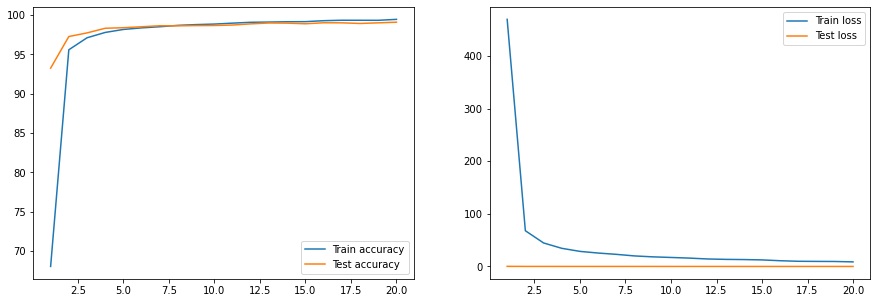

In [48]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_2.plot_accuracy()
plt.subplot(122)
model_2.plot_loss()
plt.savefig('images/model_2.png')
plt.show()

In [45]:
max(model_2.train_accuracy), max(model_2.test_accuracy)

(99.45166666666667, 99.09)

### Model 3

In [7]:
import models.model_3 as model_3
# importlib.reload(model_3)

#### Model Architecture

In [8]:
from models.model_3 import Net_3
model_3 = Net_3().to(device)
summary(model_3, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
            Conv2d-3           [-1, 10, 24, 24]             900
              ReLU-4           [-1, 10, 24, 24]               0
            Conv2d-5           [-1, 20, 22, 22]           1,800
              ReLU-6           [-1, 20, 22, 22]               0
         MaxPool2d-7           [-1, 20, 11, 11]               0
            Conv2d-8           [-1, 10, 11, 11]             200
              ReLU-9           [-1, 10, 11, 11]               0
           Conv2d-10             [-1, 10, 9, 9]             900
             ReLU-11             [-1, 10, 9, 9]               0
           Conv2d-12             [-1, 20, 7, 7]           1,800
             ReLU-13             [-1, 20, 7, 7]               0
           Conv2d-14             [-1, 1

#### Model Training

In [9]:
num_epochs = 20
train_loader, test_loader = get_train_test_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_3.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_3.model_train(device, train_loader, criterion, optimizer)
    model_3.model_test(device, test_loader, criterion)  

EPOCH: 1


Train: Loss=2.3024890422821045 Batch_id=468 Accuracy=11.41: 100%|██████████| 469/469 [00:09<00:00, 50.30it/s]



Test set: Average loss: 2.3025, Accuracy: 1500/10000 (15.00%), Accuracy Diff: 3.5867

EPOCH: 2


Train: Loss=0.9389440417289734 Batch_id=468 Accuracy=20.34: 100%|██████████| 469/469 [00:09<00:00, 50.91it/s]



Test set: Average loss: 0.8954, Accuracy: 7227/10000 (72.27%), Accuracy Diff: 51.9317

EPOCH: 3


Train: Loss=0.07534001022577286 Batch_id=468 Accuracy=91.81: 100%|██████████| 469/469 [00:09<00:00, 51.71it/s] 



Test set: Average loss: 0.1174, Accuracy: 9623/10000 (96.23%), Accuracy Diff: 4.4233

EPOCH: 4


Train: Loss=0.050652071833610535 Batch_id=468 Accuracy=96.87: 100%|██████████| 469/469 [00:09<00:00, 51.63it/s]



Test set: Average loss: 0.0654, Accuracy: 9783/10000 (97.83%), Accuracy Diff: 0.9633

EPOCH: 5


Train: Loss=0.07713764160871506 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:08<00:00, 53.11it/s] 



Test set: Average loss: 0.0603, Accuracy: 9809/10000 (98.09%), Accuracy Diff: 0.3933

EPOCH: 6


Train: Loss=0.05744849517941475 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:08<00:00, 53.03it/s] 



Test set: Average loss: 0.0608, Accuracy: 9812/10000 (98.12%), Accuracy Diff: 0.1

EPOCH: 7


Train: Loss=0.04413886368274689 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:08<00:00, 52.35it/s] 



Test set: Average loss: 0.0512, Accuracy: 9845/10000 (98.45%), Accuracy Diff: 0.1433

EPOCH: 8


Train: Loss=0.0671902671456337 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:08<00:00, 52.99it/s]  



Test set: Average loss: 0.0541, Accuracy: 9839/10000 (98.39%), Accuracy Diff: 0.01

EPOCH: 9


Train: Loss=0.012498968280851841 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:09<00:00, 50.54it/s] 



Test set: Average loss: 0.0425, Accuracy: 9875/10000 (98.75%), Accuracy Diff: 0.155

EPOCH: 10


Train: Loss=0.042229872196912766 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:09<00:00, 51.86it/s] 



Test set: Average loss: 0.0381, Accuracy: 9877/10000 (98.77%), Accuracy Diff: 0.0533

EPOCH: 11


Train: Loss=0.0042740474455058575 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:09<00:00, 50.49it/s]



Test set: Average loss: 0.0389, Accuracy: 9875/10000 (98.75%), Accuracy Diff: 0.035

EPOCH: 12


Train: Loss=0.06252070516347885 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:08<00:00, 53.02it/s]  



Test set: Average loss: 0.0458, Accuracy: 9851/10000 (98.51%), Accuracy Diff: 0.3417

EPOCH: 13


Train: Loss=0.06663662940263748 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:08<00:00, 52.77it/s]  



Test set: Average loss: 0.0414, Accuracy: 9866/10000 (98.66%), Accuracy Diff: 0.2433

EPOCH: 14


Train: Loss=0.03907877579331398 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:08<00:00, 53.05it/s]  



Test set: Average loss: 0.0504, Accuracy: 9850/10000 (98.50%), Accuracy Diff: 0.5033

EPOCH: 15


Train: Loss=0.026705361902713776 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:08<00:00, 52.26it/s] 



Test set: Average loss: 0.0485, Accuracy: 9846/10000 (98.46%), Accuracy Diff: 0.5567

EPOCH: 16


Train: Loss=0.02895130030810833 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:08<00:00, 53.24it/s]  



Test set: Average loss: 0.0479, Accuracy: 9856/10000 (98.56%), Accuracy Diff: 0.54

EPOCH: 17


Train: Loss=0.0038851797580718994 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:08<00:00, 53.69it/s]



Test set: Average loss: 0.0472, Accuracy: 9857/10000 (98.57%), Accuracy Diff: 0.5033

EPOCH: 18


Train: Loss=0.00354528590105474 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:08<00:00, 52.96it/s]  



Test set: Average loss: 0.0409, Accuracy: 9868/10000 (98.68%), Accuracy Diff: 0.4567

EPOCH: 19


Train: Loss=0.020770883187651634 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:08<00:00, 52.73it/s] 



Test set: Average loss: 0.0428, Accuracy: 9868/10000 (98.68%), Accuracy Diff: 0.51

EPOCH: 20


Train: Loss=0.05560017749667168 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:08<00:00, 53.12it/s]  



Test set: Average loss: 0.0434, Accuracy: 9876/10000 (98.76%), Accuracy Diff: 0.4567



#### Visualization of accuracy and loss

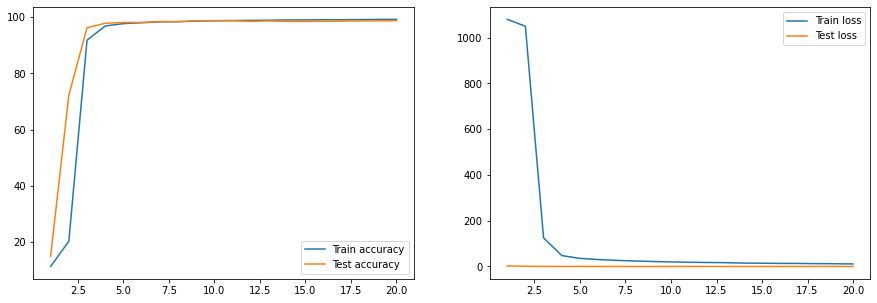

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_3.plot_accuracy()
plt.subplot(122)
model_3.plot_loss()
plt.savefig('images/model_3.png')
plt.show()

In [11]:
max(model_3.train_accuracy), max(model_3.test_accuracy)

(99.21666666666667, 98.77)

### Model 4

In [14]:
import models.model_4 as model_4
importlib.reload(model_4)

<module 'models.model_4' from 'd:\\Self Learning\\TSAI\\TSAI\\S7\\models\\model_4.py'>

#### Model Architecture

In [15]:
from models.model_4 import Net_4
model_4 = Net_4().to(device)
summary(model_4, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 20, 22, 22]           1,800
       BatchNorm2d-8           [-1, 20, 22, 22]              40
              ReLU-9           [-1, 20, 22, 22]               0
        MaxPool2d-10           [-1, 20, 11, 11]               0
           Conv2d-11           [-1, 10, 11, 11]             200
      BatchNorm2d-12           [-1, 10, 11, 11]              20
             ReLU-13           [-1, 10, 11, 11]               0
           Conv2d-14             [-1, 1

#### Model Training

In [16]:
num_epochs = 20
train_loader, test_loader = get_train_test_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_4.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_4.model_train(device, train_loader, criterion, optimizer)
    model_4.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=0.07537244260311127 Batch_id=468 Accuracy=94.48: 100%|██████████| 469/469 [00:10<00:00, 44.82it/s] 



Test set: Average loss: 0.0596, Accuracy: 9821/10000 (98.21%), Accuracy Diff: 3.7333

EPOCH: 2


Train: Loss=0.044004276394844055 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:10<00:00, 46.23it/s]



Test set: Average loss: 0.0422, Accuracy: 9859/10000 (98.59%), Accuracy Diff: 0.25

EPOCH: 3


Train: Loss=0.00899528618901968 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:09<00:00, 49.26it/s]  



Test set: Average loss: 0.0351, Accuracy: 9892/10000 (98.92%), Accuracy Diff: 0.2233

EPOCH: 4


Train: Loss=0.005688326898962259 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:09<00:00, 49.94it/s] 



Test set: Average loss: 0.0328, Accuracy: 9890/10000 (98.90%), Accuracy Diff: 0.0083

EPOCH: 5


Train: Loss=0.09419834613800049 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:09<00:00, 51.34it/s]  



Test set: Average loss: 0.0310, Accuracy: 9892/10000 (98.92%), Accuracy Diff: 0.1867

EPOCH: 6


Train: Loss=0.018597526475787163 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:10<00:00, 42.70it/s] 



Test set: Average loss: 0.0329, Accuracy: 9901/10000 (99.01%), Accuracy Diff: 0.1783

EPOCH: 7


Train: Loss=0.04637040197849274 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:09<00:00, 47.57it/s]  



Test set: Average loss: 0.0300, Accuracy: 9904/10000 (99.04%), Accuracy Diff: 0.275

EPOCH: 8


Train: Loss=0.008900046348571777 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:09<00:00, 50.30it/s] 



Test set: Average loss: 0.0285, Accuracy: 9899/10000 (98.99%), Accuracy Diff: 0.4217

EPOCH: 9


Train: Loss=0.0026563843712210655 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:09<00:00, 50.14it/s]



Test set: Average loss: 0.0278, Accuracy: 9906/10000 (99.06%), Accuracy Diff: 0.4233

EPOCH: 10


Train: Loss=0.0077663809061050415 Batch_id=468 Accuracy=99.55: 100%|██████████| 469/469 [00:09<00:00, 49.60it/s]



Test set: Average loss: 0.0274, Accuracy: 9912/10000 (99.12%), Accuracy Diff: 0.43

EPOCH: 11


Train: Loss=0.008376185782253742 Batch_id=468 Accuracy=99.62: 100%|██████████| 469/469 [00:11<00:00, 41.08it/s] 



Test set: Average loss: 0.0259, Accuracy: 9914/10000 (99.14%), Accuracy Diff: 0.4833

EPOCH: 12


Train: Loss=0.0036652926355600357 Batch_id=468 Accuracy=99.61: 100%|██████████| 469/469 [00:11<00:00, 40.16it/s]



Test set: Average loss: 0.0250, Accuracy: 9915/10000 (99.15%), Accuracy Diff: 0.4633

EPOCH: 13


Train: Loss=0.008752438239753246 Batch_id=468 Accuracy=99.69: 100%|██████████| 469/469 [00:08<00:00, 53.25it/s] 



Test set: Average loss: 0.0285, Accuracy: 9909/10000 (99.09%), Accuracy Diff: 0.595

EPOCH: 14


Train: Loss=0.008953439071774483 Batch_id=468 Accuracy=99.71: 100%|██████████| 469/469 [00:08<00:00, 52.54it/s]  



Test set: Average loss: 0.0274, Accuracy: 9918/10000 (99.18%), Accuracy Diff: 0.5317

EPOCH: 15


Train: Loss=0.005511730909347534 Batch_id=468 Accuracy=99.73: 100%|██████████| 469/469 [00:08<00:00, 53.48it/s]  



Test set: Average loss: 0.0243, Accuracy: 9925/10000 (99.25%), Accuracy Diff: 0.4783

EPOCH: 16


Train: Loss=0.004773695021867752 Batch_id=468 Accuracy=99.78: 100%|██████████| 469/469 [00:08<00:00, 52.17it/s]  



Test set: Average loss: 0.0246, Accuracy: 9927/10000 (99.27%), Accuracy Diff: 0.51

EPOCH: 17


Train: Loss=0.0049116420559585094 Batch_id=468 Accuracy=99.82: 100%|██████████| 469/469 [00:09<00:00, 48.18it/s] 



Test set: Average loss: 0.0272, Accuracy: 9917/10000 (99.17%), Accuracy Diff: 0.6467

EPOCH: 18


Train: Loss=0.003475317033007741 Batch_id=468 Accuracy=99.82: 100%|██████████| 469/469 [00:10<00:00, 45.09it/s]  



Test set: Average loss: 0.0249, Accuracy: 9920/10000 (99.20%), Accuracy Diff: 0.6217

EPOCH: 19


Train: Loss=0.016434984281659126 Batch_id=468 Accuracy=99.88: 100%|██████████| 469/469 [00:09<00:00, 48.00it/s]  



Test set: Average loss: 0.0258, Accuracy: 9920/10000 (99.20%), Accuracy Diff: 0.6767

EPOCH: 20


Train: Loss=0.008198929019272327 Batch_id=468 Accuracy=99.88: 100%|██████████| 469/469 [00:10<00:00, 45.91it/s]  



Test set: Average loss: 0.0259, Accuracy: 9924/10000 (99.24%), Accuracy Diff: 0.6383



#### Visualization of accuracy and loss

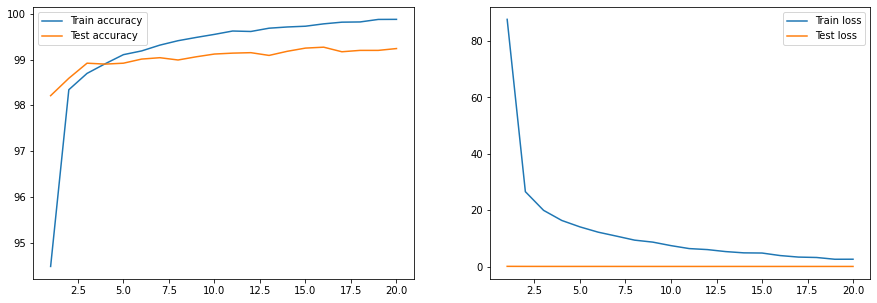

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_4.plot_accuracy()
plt.subplot(122)
model_4.plot_loss()
plt.savefig('images/model_4.png')
plt.show()

In [20]:
max(model_4.train_accuracy), max(model_4.test_accuracy)

(99.87833333333333, 99.27)

### Model 5

In [10]:
import models.model_5 as model_5
importlib.reload(model_5)

<module 'models.model_5' from 'd:\\Self Learning\\TSAI\\TSAI\\S7\\models\\model_5.py'>

#### Model Architecture

In [11]:
from models.model_5 import Net_5
model_5 = Net_5().to(device)
summary(model_5, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 20, 22, 22]           1,800
      BatchNorm2d-10           [-1, 20, 22, 22]              40
             ReLU-11           [-1, 20, 22, 22]               0
          Dropout-12           [-1, 20, 22, 22]               0
        MaxPool2d-13           [-1, 20, 11, 11]               0
           Conv2d-14           [-1, 10,

#### Model Training

In [13]:
num_epochs = 20
train_loader, test_loader = get_train_test_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_5.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_5.model_train(device, train_loader, criterion, optimizer)
    model_5.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=0.11134352535009384 Batch_id=468 Accuracy=93.17: 100%|██████████| 469/469 [00:28<00:00, 16.61it/s] 



Test set: Average loss: 0.0648, Accuracy: 9799/10000 (97.99%), Accuracy Diff: 4.8167

EPOCH: 2


Train: Loss=0.0509178601205349 Batch_id=468 Accuracy=97.94: 100%|██████████| 469/469 [00:27<00:00, 17.24it/s]  



Test set: Average loss: 0.0487, Accuracy: 9851/10000 (98.51%), Accuracy Diff: 0.5717

EPOCH: 3


Train: Loss=0.01788383163511753 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:28<00:00, 16.19it/s]  



Test set: Average loss: 0.0389, Accuracy: 9873/10000 (98.73%), Accuracy Diff: 0.365

EPOCH: 4


Train: Loss=0.03512706235051155 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:29<00:00, 16.15it/s] 



Test set: Average loss: 0.0307, Accuracy: 9897/10000 (98.97%), Accuracy Diff: 0.3767

EPOCH: 5


Train: Loss=0.028305860236287117 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:26<00:00, 18.02it/s] 



Test set: Average loss: 0.0322, Accuracy: 9899/10000 (98.99%), Accuracy Diff: 0.2333

EPOCH: 6


Train: Loss=0.051483917981386185 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:30<00:00, 15.42it/s] 



Test set: Average loss: 0.0335, Accuracy: 9901/10000 (99.01%), Accuracy Diff: 0.1783

EPOCH: 7


Train: Loss=0.029897823929786682 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:28<00:00, 16.27it/s] 



Test set: Average loss: 0.0270, Accuracy: 9915/10000 (99.15%), Accuracy Diff: 0.2633

EPOCH: 8


Train: Loss=0.005875559989362955 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:27<00:00, 17.33it/s] 



Test set: Average loss: 0.0288, Accuracy: 9910/10000 (99.10%), Accuracy Diff: 0.085

EPOCH: 9


Train: Loss=0.011466684751212597 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:26<00:00, 18.02it/s] 



Test set: Average loss: 0.0254, Accuracy: 9922/10000 (99.22%), Accuracy Diff: 0.1733

EPOCH: 10


Train: Loss=0.01702124997973442 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:28<00:00, 16.55it/s]  



Test set: Average loss: 0.0291, Accuracy: 9904/10000 (99.04%), Accuracy Diff: 0.0017

EPOCH: 11


Train: Loss=0.007264403626322746 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:22<00:00, 20.69it/s] 



Test set: Average loss: 0.0265, Accuracy: 9911/10000 (99.11%), Accuracy Diff: 0.015

EPOCH: 12


Train: Loss=0.004853251855820417 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:28<00:00, 16.62it/s] 



Test set: Average loss: 0.0280, Accuracy: 9908/10000 (99.08%), Accuracy Diff: 0.0583

EPOCH: 13


Train: Loss=0.027384696528315544 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:26<00:00, 17.57it/s] 



Test set: Average loss: 0.0246, Accuracy: 9918/10000 (99.18%), Accuracy Diff: 0.015

EPOCH: 14


Train: Loss=0.03159750625491142 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:27<00:00, 17.26it/s]  



Test set: Average loss: 0.0261, Accuracy: 9918/10000 (99.18%), Accuracy Diff: 0.0733

EPOCH: 15


Train: Loss=0.0042220549657940865 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:30<00:00, 15.46it/s]



Test set: Average loss: 0.0281, Accuracy: 9917/10000 (99.17%), Accuracy Diff: 0.12

EPOCH: 16


Train: Loss=0.012651982717216015 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:38<00:00, 12.19it/s] 



Test set: Average loss: 0.0250, Accuracy: 9917/10000 (99.17%), Accuracy Diff: 0.07

EPOCH: 17


Train: Loss=0.002198119880631566 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:29<00:00, 15.98it/s] 



Test set: Average loss: 0.0265, Accuracy: 9924/10000 (99.24%), Accuracy Diff: 0.0567

EPOCH: 18


Train: Loss=0.003751164535060525 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:26<00:00, 17.87it/s] 



Test set: Average loss: 0.0228, Accuracy: 9926/10000 (99.26%), Accuracy Diff: 0.0217

EPOCH: 19


Train: Loss=0.04585617408156395 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:27<00:00, 17.20it/s]  



Test set: Average loss: 0.0248, Accuracy: 9925/10000 (99.25%), Accuracy Diff: 0.0983

EPOCH: 20


Train: Loss=0.01793397031724453 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:24<00:00, 19.06it/s]  



Test set: Average loss: 0.0239, Accuracy: 9928/10000 (99.28%), Accuracy Diff: 0.085



#### Visualization of accuracy and loss

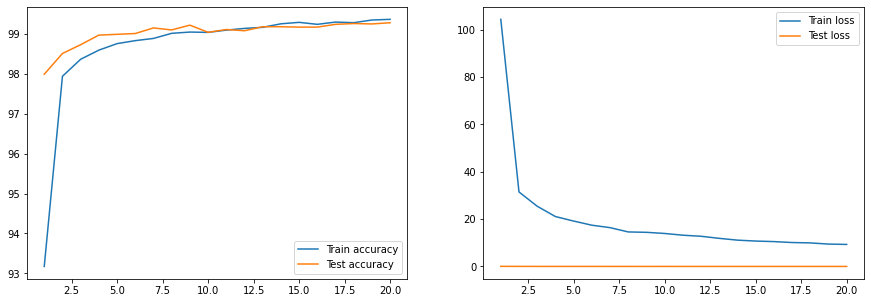

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_5.plot_accuracy()
plt.subplot(122)
model_5.plot_loss()
plt.savefig('images/model_5.png')
plt.show()

In [15]:
max(model_5.train_accuracy), max(model_5.test_accuracy)

(99.365, 99.28)

### Model 6

In [19]:
import models.model_6 as model_6
importlib.reload(model_6)

<module 'models.model_6' from 'd:\\Self Learning\\TSAI\\TSAI\\S7\\models\\model_6.py'>

#### Model Architecture

In [20]:
from models.model_6 import Net_6
model_6 = Net_6().to(device)
summary(model_6, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 20, 22, 22]           1,800
      BatchNorm2d-10           [-1, 20, 22, 22]              40
             ReLU-11           [-1, 20, 22, 22]               0
          Dropout-12           [-1, 20, 22, 22]               0
        MaxPool2d-13           [-1, 20, 11, 11]               0
           Conv2d-14           [-1, 10,

#### Model Training

In [21]:
num_epochs = 20
train_loader, test_loader = get_train_test_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_6.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_6.model_train(device, train_loader, criterion, optimizer)
    model_6.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=0.3316430151462555 Batch_id=468 Accuracy=72.12: 100%|██████████| 469/469 [00:10<00:00, 43.43it/s] 



Test set: Average loss: 0.3008, Accuracy: 9330/10000 (93.30%), Accuracy Diff: 21.1767

EPOCH: 2


Train: Loss=0.10043537616729736 Batch_id=468 Accuracy=95.66: 100%|██████████| 469/469 [00:08<00:00, 53.42it/s] 



Test set: Average loss: 0.1116, Accuracy: 9738/10000 (97.38%), Accuracy Diff: 1.72

EPOCH: 3


Train: Loss=0.09310132265090942 Batch_id=468 Accuracy=97.04: 100%|██████████| 469/469 [00:08<00:00, 54.06it/s] 



Test set: Average loss: 0.0771, Accuracy: 9797/10000 (97.97%), Accuracy Diff: 0.9267

EPOCH: 4


Train: Loss=0.05141575261950493 Batch_id=468 Accuracy=97.45: 100%|██████████| 469/469 [00:08<00:00, 54.84it/s] 



Test set: Average loss: 0.0671, Accuracy: 9822/10000 (98.22%), Accuracy Diff: 0.765

EPOCH: 5


Train: Loss=0.06213383004069328 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:08<00:00, 54.59it/s] 



Test set: Average loss: 0.0690, Accuracy: 9804/10000 (98.04%), Accuracy Diff: 0.2117

EPOCH: 6


Train: Loss=0.15142616629600525 Batch_id=468 Accuracy=97.88: 100%|██████████| 469/469 [00:08<00:00, 54.07it/s] 



Test set: Average loss: 0.0574, Accuracy: 9822/10000 (98.22%), Accuracy Diff: 0.3417

EPOCH: 7


Train: Loss=0.062207769602537155 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:08<00:00, 54.60it/s]



Test set: Average loss: 0.0525, Accuracy: 9844/10000 (98.44%), Accuracy Diff: 0.33

EPOCH: 8


Train: Loss=0.094244085252285 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:08<00:00, 54.34it/s]   



Test set: Average loss: 0.0488, Accuracy: 9858/10000 (98.58%), Accuracy Diff: 0.3633

EPOCH: 9


Train: Loss=0.1196851059794426 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:08<00:00, 54.75it/s]  



Test set: Average loss: 0.0460, Accuracy: 9862/10000 (98.62%), Accuracy Diff: 0.3433

EPOCH: 10


Train: Loss=0.16726630926132202 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:08<00:00, 54.17it/s] 



Test set: Average loss: 0.0424, Accuracy: 9873/10000 (98.73%), Accuracy Diff: 0.3133

EPOCH: 11


Train: Loss=0.059885669499635696 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:08<00:00, 54.22it/s]



Test set: Average loss: 0.0459, Accuracy: 9860/10000 (98.60%), Accuracy Diff: 0.18

EPOCH: 12


Train: Loss=0.022365249693393707 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:08<00:00, 54.56it/s]



Test set: Average loss: 0.0452, Accuracy: 9858/10000 (98.58%), Accuracy Diff: 0.0133

EPOCH: 13


Train: Loss=0.09147369861602783 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:08<00:00, 52.42it/s] 



Test set: Average loss: 0.0352, Accuracy: 9896/10000 (98.96%), Accuracy Diff: 0.4383

EPOCH: 14


Train: Loss=0.011266965419054031 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:08<00:00, 53.09it/s]



Test set: Average loss: 0.0430, Accuracy: 9866/10000 (98.66%), Accuracy Diff: 0.0683

EPOCH: 15


Train: Loss=0.05829330161213875 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:08<00:00, 53.88it/s] 



Test set: Average loss: 0.0376, Accuracy: 9892/10000 (98.92%), Accuracy Diff: 0.2783

EPOCH: 16


Train: Loss=0.04511847719550133 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:08<00:00, 53.08it/s] 



Test set: Average loss: 0.0346, Accuracy: 9900/10000 (99.00%), Accuracy Diff: 0.3533

EPOCH: 17


Train: Loss=0.08975780010223389 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:08<00:00, 52.16it/s] 



Test set: Average loss: 0.0434, Accuracy: 9856/10000 (98.56%), Accuracy Diff: 0.1417

EPOCH: 18


Train: Loss=0.10614404082298279 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:08<00:00, 53.19it/s] 



Test set: Average loss: 0.0333, Accuracy: 9900/10000 (99.00%), Accuracy Diff: 0.2983

EPOCH: 19


Train: Loss=0.031682781875133514 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:08<00:00, 53.20it/s]



Test set: Average loss: 0.0362, Accuracy: 9878/10000 (98.78%), Accuracy Diff: 0.1033

EPOCH: 20


Train: Loss=0.05749465152621269 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:10<00:00, 45.13it/s]  



Test set: Average loss: 0.0350, Accuracy: 9891/10000 (98.91%), Accuracy Diff: 0.1633



#### Visualization of accuracy and loss

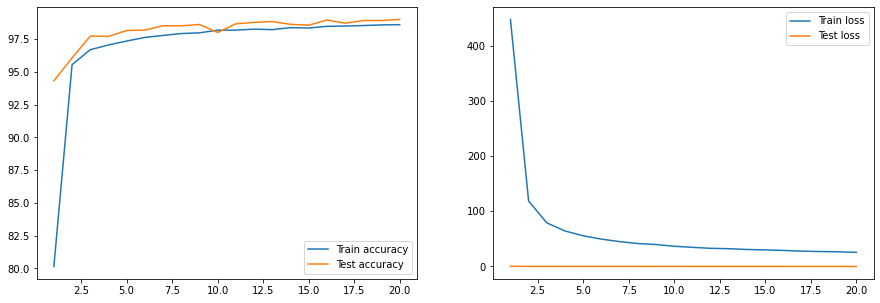

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_6.plot_accuracy()
plt.subplot(122)
model_6.plot_loss()
plt.savefig('images/model_6.png')
plt.show()

In [22]:
max(model_6.train_accuracy), max(model_6.test_accuracy)

(98.74666666666667, 99.0)

### Model 7

In [14]:
import models.model_7 as model_7
importlib.reload(model_7)

<module 'models.model_7' from 'd:\\Self Learning\\TSAI\\TSAI\\S7\\models\\model_7.py'>

#### Model Architecture

In [15]:
from models.model_7 import Net_7
model_7 = Net_7().to(device)
summary(model_7, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 20, 22, 22]           1,800
      BatchNorm2d-10           [-1, 20, 22, 22]              40
             ReLU-11           [-1, 20, 22, 22]               0
          Dropout-12           [-1, 20, 22, 22]               0
        MaxPool2d-13           [-1, 20, 11, 11]               0
           Conv2d-14           [-1, 10,

#### Model Training

In [16]:
num_epochs = 20
train_loader, test_loader = get_train_test_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_7.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_7.model_train(device, train_loader, criterion, optimizer)
    model_7.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=0.17008697986602783 Batch_id=468 Accuracy=84.60: 100%|██████████| 469/469 [00:12<00:00, 39.07it/s]



Test set: Average loss: 0.0989, Accuracy: 9779/10000 (97.79%), Accuracy Diff: 13.19

EPOCH: 2


Train: Loss=0.0997638925909996 Batch_id=468 Accuracy=97.53: 100%|██████████| 469/469 [00:10<00:00, 44.04it/s]  



Test set: Average loss: 0.0636, Accuracy: 9820/10000 (98.20%), Accuracy Diff: 0.6717

EPOCH: 3


Train: Loss=0.09420866519212723 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:11<00:00, 41.98it/s] 



Test set: Average loss: 0.0442, Accuracy: 9878/10000 (98.78%), Accuracy Diff: 0.5883

EPOCH: 4


Train: Loss=0.027178332209587097 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:10<00:00, 44.96it/s]



Test set: Average loss: 0.0371, Accuracy: 9892/10000 (98.92%), Accuracy Diff: 0.4267

EPOCH: 5


Train: Loss=0.03376225382089615 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:10<00:00, 45.59it/s] 



Test set: Average loss: 0.0330, Accuracy: 9896/10000 (98.96%), Accuracy Diff: 0.295

EPOCH: 6


Train: Loss=0.037910278886556625 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:10<00:00, 44.90it/s]



Test set: Average loss: 0.0322, Accuracy: 9897/10000 (98.97%), Accuracy Diff: 0.1967

EPOCH: 7


Train: Loss=0.04729451239109039 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:10<00:00, 45.56it/s]  



Test set: Average loss: 0.0262, Accuracy: 9912/10000 (99.12%), Accuracy Diff: 0.2683

EPOCH: 8


Train: Loss=0.023412197828292847 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:10<00:00, 44.77it/s]



Test set: Average loss: 0.0275, Accuracy: 9916/10000 (99.16%), Accuracy Diff: 0.2033

EPOCH: 9


Train: Loss=0.0704507827758789 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:10<00:00, 44.51it/s]   



Test set: Average loss: 0.0265, Accuracy: 9920/10000 (99.20%), Accuracy Diff: 0.225

EPOCH: 10


Train: Loss=0.01293329056352377 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:10<00:00, 45.58it/s]  



Test set: Average loss: 0.0256, Accuracy: 9917/10000 (99.17%), Accuracy Diff: 0.185

EPOCH: 11


Train: Loss=0.0038663882296532393 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:10<00:00, 45.24it/s]



Test set: Average loss: 0.0293, Accuracy: 9912/10000 (99.12%), Accuracy Diff: 0.0383

EPOCH: 12


Train: Loss=0.028567299246788025 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:10<00:00, 45.03it/s] 



Test set: Average loss: 0.0258, Accuracy: 9924/10000 (99.24%), Accuracy Diff: 0.145

EPOCH: 13


Train: Loss=0.033442169427871704 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:10<00:00, 44.88it/s] 



Test set: Average loss: 0.0239, Accuracy: 9921/10000 (99.21%), Accuracy Diff: 0.0883

EPOCH: 14


Train: Loss=0.04817571863532066 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:10<00:00, 45.32it/s]  



Test set: Average loss: 0.0221, Accuracy: 9929/10000 (99.29%), Accuracy Diff: 0.1183

EPOCH: 15


Train: Loss=0.01418378297239542 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:10<00:00, 44.41it/s]  



Test set: Average loss: 0.0250, Accuracy: 9924/10000 (99.24%), Accuracy Diff: 0.0367

EPOCH: 16


Train: Loss=0.0236178208142519 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:10<00:00, 45.99it/s]   



Test set: Average loss: 0.0228, Accuracy: 9924/10000 (99.24%), Accuracy Diff: 0.0467

EPOCH: 17


Train: Loss=0.09255007654428482 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:10<00:00, 45.73it/s]  



Test set: Average loss: 0.0241, Accuracy: 9922/10000 (99.22%), Accuracy Diff: 0.0033

EPOCH: 18


Train: Loss=0.060672368854284286 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:10<00:00, 45.56it/s] 



Test set: Average loss: 0.0231, Accuracy: 9924/10000 (99.24%), Accuracy Diff: 0.05

EPOCH: 19


Train: Loss=0.0151669355109334 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:10<00:00, 45.51it/s]   



Test set: Average loss: 0.0205, Accuracy: 9933/10000 (99.33%), Accuracy Diff: 0.08

EPOCH: 20


Train: Loss=0.00860810186713934 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:10<00:00, 45.41it/s]  



Test set: Average loss: 0.0216, Accuracy: 9929/10000 (99.29%), Accuracy Diff: 0.05



#### Visualization of accuracy and loss

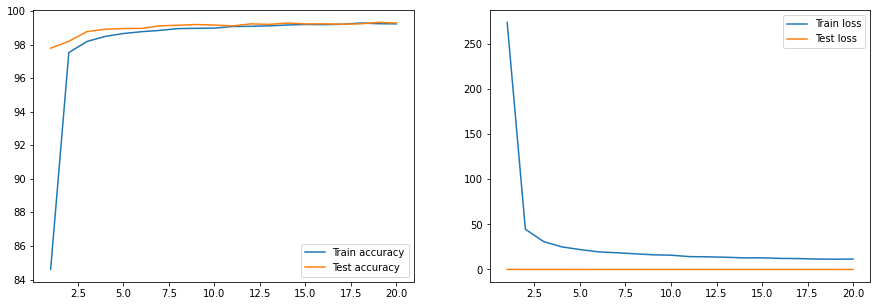

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_7.plot_accuracy()
plt.subplot(122)
model_7.plot_loss()
plt.savefig('images/model_7.png')
plt.show()

In [18]:
max(model_7.train_accuracy), max(model_7.test_accuracy)

(99.29, 99.33)

### Model 8

In [10]:
import models.model_8 as model_8
importlib.reload(model_8)

<module 'models.model_8' from 'd:\\Self Learning\\TSAI\\TSAI\\S7\\models\\model_8.py'>

#### Model Architecture

In [11]:
from models.model_8 import Net_8
model_8 = Net_8().to(device)
summary(model_8, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
       BatchNorm2d-2           [-1, 16, 26, 26]              32
              ReLU-3           [-1, 16, 26, 26]               0
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
       BatchNorm2d-6           [-1, 32, 24, 24]              64
              ReLU-7           [-1, 32, 24, 24]               0
           Dropout-8           [-1, 32, 24, 24]               0
         MaxPool2d-9           [-1, 32, 12, 12]               0
           Conv2d-10           [-1, 10, 12, 12]             320
      BatchNorm2d-11           [-1, 10, 12, 12]              20
             ReLU-12           [-1, 10, 12, 12]               0
           Conv2d-13           [-1, 16, 10, 10]           1,440
      BatchNorm2d-14           [-1, 16,

#### Model Training

In [12]:
num_epochs = 20
train_loader, test_loader = get_train_test_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_8.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_8.model_train(device, train_loader, criterion, optimizer)
    model_8.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=0.16075371205806732 Batch_id=468 Accuracy=84.69: 100%|██████████| 469/469 [00:26<00:00, 17.41it/s] 



Test set: Average loss: 0.0794, Accuracy: 9817/10000 (98.17%), Accuracy Diff: 13.4833

EPOCH: 2


Train: Loss=0.0981130599975586 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:22<00:00, 20.68it/s]  



Test set: Average loss: 0.0470, Accuracy: 9880/10000 (98.80%), Accuracy Diff: 0.85

EPOCH: 3


Train: Loss=0.02451878972351551 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:24<00:00, 18.84it/s] 



Test set: Average loss: 0.0332, Accuracy: 9907/10000 (99.07%), Accuracy Diff: 0.655

EPOCH: 4


Train: Loss=0.048151493072509766 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:21<00:00, 22.02it/s] 



Test set: Average loss: 0.0260, Accuracy: 9933/10000 (99.33%), Accuracy Diff: 0.65

EPOCH: 5


Train: Loss=0.013698914088308811 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:22<00:00, 20.60it/s]



Test set: Average loss: 0.0214, Accuracy: 9933/10000 (99.33%), Accuracy Diff: 0.5517

EPOCH: 6


Train: Loss=0.015638437122106552 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:22<00:00, 20.44it/s] 



Test set: Average loss: 0.0288, Accuracy: 9922/10000 (99.22%), Accuracy Diff: 0.3383

EPOCH: 7


Train: Loss=0.02028713934123516 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:20<00:00, 22.81it/s]  



Test set: Average loss: 0.0216, Accuracy: 9938/10000 (99.38%), Accuracy Diff: 0.3967

EPOCH: 8


Train: Loss=0.003782460233196616 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:20<00:00, 23.18it/s] 



Test set: Average loss: 0.0204, Accuracy: 9940/10000 (99.40%), Accuracy Diff: 0.3483

EPOCH: 9


Train: Loss=0.03500426188111305 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:27<00:00, 17.25it/s]  



Test set: Average loss: 0.0197, Accuracy: 9942/10000 (99.42%), Accuracy Diff: 0.32

EPOCH: 10


Train: Loss=0.04156249016523361 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:25<00:00, 18.53it/s]  



Test set: Average loss: 0.0213, Accuracy: 9937/10000 (99.37%), Accuracy Diff: 0.2467

EPOCH: 11


Train: Loss=0.039945315569639206 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:28<00:00, 16.23it/s] 



Test set: Average loss: 0.0188, Accuracy: 9942/10000 (99.42%), Accuracy Diff: 0.1917

EPOCH: 12


Train: Loss=0.01776883192360401 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:27<00:00, 16.80it/s]  



Test set: Average loss: 0.0200, Accuracy: 9939/10000 (99.39%), Accuracy Diff: 0.1417

EPOCH: 13


Train: Loss=0.01922302506864071 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:28<00:00, 16.40it/s]  



Test set: Average loss: 0.0170, Accuracy: 9946/10000 (99.46%), Accuracy Diff: 0.2383

EPOCH: 14


Train: Loss=0.05761902034282684 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:29<00:00, 16.14it/s]  



Test set: Average loss: 0.0174, Accuracy: 9949/10000 (99.49%), Accuracy Diff: 0.235

EPOCH: 15


Train: Loss=0.012626465409994125 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:26<00:00, 18.02it/s] 



Test set: Average loss: 0.0181, Accuracy: 9938/10000 (99.38%), Accuracy Diff: 0.1367

EPOCH: 16


Train: Loss=0.05356064438819885 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:20<00:00, 22.69it/s]  



Test set: Average loss: 0.0187, Accuracy: 9944/10000 (99.44%), Accuracy Diff: 0.1633

EPOCH: 17


Train: Loss=0.016297439113259315 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:22<00:00, 20.79it/s] 



Test set: Average loss: 0.0194, Accuracy: 9946/10000 (99.46%), Accuracy Diff: 0.155

EPOCH: 18


Train: Loss=0.006364618893712759 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:30<00:00, 15.30it/s] 



Test set: Average loss: 0.0190, Accuracy: 9941/10000 (99.41%), Accuracy Diff: 0.1217

EPOCH: 19


Train: Loss=0.012795246206223965 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:29<00:00, 15.80it/s] 



Test set: Average loss: 0.0191, Accuracy: 9944/10000 (99.44%), Accuracy Diff: 0.08

EPOCH: 20


Train: Loss=0.004038733895868063 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:26<00:00, 17.40it/s] 



Test set: Average loss: 0.0170, Accuracy: 9944/10000 (99.44%), Accuracy Diff: 0.0633



#### Visualization of accuracy and loss

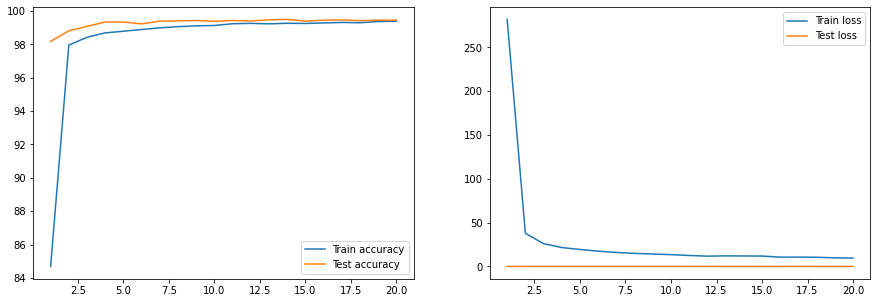

In [15]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_8.plot_accuracy()
plt.subplot(122)
model_8.plot_loss()
plt.savefig('images/model_8.png')
plt.show()

In [16]:
max(model_8.train_accuracy), max(model_8.test_accuracy)

(99.37666666666667, 99.49)

### Model 9

In [ ]:
import models.model_9 as model_9
importlib.reload(model_9)

<module 'models.model_8' from 'd:\\Self Learning\\TSAI\\TSAI\\S7\\models\\model_8.py'>

#### Model Architecture

In [6]:
from models.model_9 import Net_9
model_9 = Net_9().to(device)
summary(model_9, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
       BatchNorm2d-2           [-1, 16, 26, 26]              32
              ReLU-3           [-1, 16, 26, 26]               0
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
       BatchNorm2d-6           [-1, 32, 24, 24]              64
              ReLU-7           [-1, 32, 24, 24]               0
           Dropout-8           [-1, 32, 24, 24]               0
         MaxPool2d-9           [-1, 32, 12, 12]               0
           Conv2d-10           [-1, 10, 12, 12]             320
      BatchNorm2d-11           [-1, 10, 12, 12]              20
             ReLU-12           [-1, 10, 12, 12]               0
           Conv2d-13           [-1, 16, 10, 10]           1,440
      BatchNorm2d-14           [-1, 16,

#### Model Training

In [7]:
num_epochs = 20
train_loader, test_loader = get_train_test_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_9.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_9.model_train(device, train_loader, criterion, optimizer)
    model_9.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=0.1914314180612564 Batch_id=468 Accuracy=81.46: 100%|██████████| 469/469 [00:26<00:00, 17.78it/s] 



Test set: Average loss: 0.1342, Accuracy: 9705/10000 (97.05%), Accuracy Diff: 15.5867

EPOCH: 2


Train: Loss=0.07999856024980545 Batch_id=468 Accuracy=97.03: 100%|██████████| 469/469 [00:25<00:00, 18.15it/s] 



Test set: Average loss: 0.0710, Accuracy: 9820/10000 (98.20%), Accuracy Diff: 1.1667

EPOCH: 3


Train: Loss=0.02816617488861084 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:23<00:00, 20.16it/s] 



Test set: Average loss: 0.0495, Accuracy: 9870/10000 (98.70%), Accuracy Diff: 0.725

EPOCH: 4


Train: Loss=0.060029033571481705 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:20<00:00, 22.59it/s]



Test set: Average loss: 0.0422, Accuracy: 9878/10000 (98.78%), Accuracy Diff: 0.5067

EPOCH: 5


Train: Loss=0.034623514860868454 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:33<00:00, 14.07it/s]



Test set: Average loss: 0.0386, Accuracy: 9889/10000 (98.89%), Accuracy Diff: 0.4167

EPOCH: 6


Train: Loss=0.12484913319349289 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:30<00:00, 15.61it/s] 



Test set: Average loss: 0.0318, Accuracy: 9915/10000 (99.15%), Accuracy Diff: 0.47

EPOCH: 7


Train: Loss=0.010033565573394299 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:25<00:00, 18.16it/s]



Test set: Average loss: 0.0304, Accuracy: 9907/10000 (99.07%), Accuracy Diff: 0.295

EPOCH: 8


Train: Loss=0.031047990545630455 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:25<00:00, 18.68it/s]



Test set: Average loss: 0.0311, Accuracy: 9903/10000 (99.03%), Accuracy Diff: 0.155

EPOCH: 9


Train: Loss=0.028083031997084618 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:22<00:00, 21.17it/s]



Test set: Average loss: 0.0298, Accuracy: 9911/10000 (99.11%), Accuracy Diff: 0.2567

EPOCH: 10


Train: Loss=0.04063662886619568 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:25<00:00, 18.07it/s]  



Test set: Average loss: 0.0269, Accuracy: 9916/10000 (99.16%), Accuracy Diff: 0.2283

EPOCH: 11


Train: Loss=0.023614177480340004 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:27<00:00, 17.11it/s] 



Test set: Average loss: 0.0298, Accuracy: 9903/10000 (99.03%), Accuracy Diff: 0.07

EPOCH: 12


Train: Loss=0.035515304654836655 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:28<00:00, 16.61it/s] 



Test set: Average loss: 0.0240, Accuracy: 9928/10000 (99.28%), Accuracy Diff: 0.265

EPOCH: 13


Train: Loss=0.009921115823090076 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:25<00:00, 18.35it/s] 



Test set: Average loss: 0.0270, Accuracy: 9923/10000 (99.23%), Accuracy Diff: 0.085

EPOCH: 14


Train: Loss=0.07948124408721924 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:24<00:00, 18.85it/s]  



Test set: Average loss: 0.0223, Accuracy: 9934/10000 (99.34%), Accuracy Diff: 0.2183

EPOCH: 15


Train: Loss=0.05256851390004158 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:24<00:00, 19.20it/s]  



Test set: Average loss: 0.0247, Accuracy: 9923/10000 (99.23%), Accuracy Diff: 0.13

EPOCH: 16


Train: Loss=0.05492434278130531 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:24<00:00, 19.30it/s]  



Test set: Average loss: 0.0253, Accuracy: 9922/10000 (99.22%), Accuracy Diff: 0.0483

EPOCH: 17


Train: Loss=0.0625431090593338 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:24<00:00, 19.07it/s]   



Test set: Average loss: 0.0227, Accuracy: 9928/10000 (99.28%), Accuracy Diff: 0.1033

EPOCH: 18


Train: Loss=0.009125174954533577 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:23<00:00, 20.39it/s] 



Test set: Average loss: 0.0248, Accuracy: 9929/10000 (99.29%), Accuracy Diff: 0.11

EPOCH: 19


Train: Loss=0.005884544923901558 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:25<00:00, 18.13it/s] 



Test set: Average loss: 0.0214, Accuracy: 9932/10000 (99.32%), Accuracy Diff: 0.1017

EPOCH: 20


Train: Loss=0.04818341135978699 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:26<00:00, 17.88it/s]  



Test set: Average loss: 0.0235, Accuracy: 9931/10000 (99.31%), Accuracy Diff: 0.0733



#### Visualization of accuracy and loss

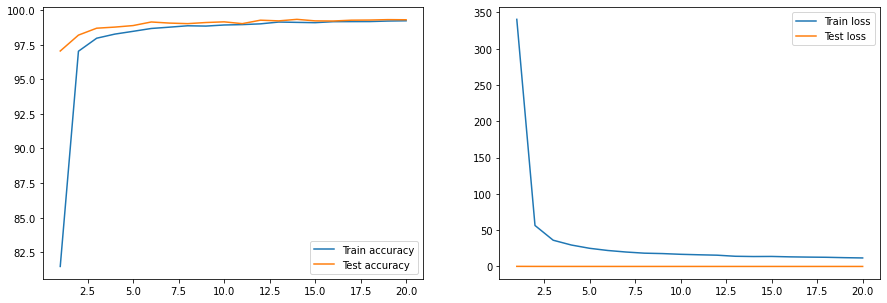

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_9.plot_accuracy()
plt.subplot(122)
model_9.plot_loss()
plt.savefig('images/model_9.png')
plt.show()

In [9]:
max(model_9.train_accuracy), max(model_9.test_accuracy)

(99.23666666666666, 99.34)

### Model 10

In [ ]:
import models.model_10 as model_10
importlib.reload(model_10)

<module 'models.model_8' from 'd:\\Self Learning\\TSAI\\TSAI\\S7\\models\\model_8.py'>

#### Model Architecture

In [6]:
from models.model_10 import Net_10
model_10 = Net_10().to(device)
summary(model_10, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
              ReLU-7           [-1, 16, 24, 24]               0
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10           [-1, 10, 12, 12]             160
      BatchNorm2d-11           [-1, 10, 12, 12]              20
             ReLU-12           [-1, 10, 12, 12]               0
           Conv2d-13           [-1, 16, 10, 10]           1,440
      BatchNorm2d-14           [-1, 16,

#### Model Training

In [7]:
num_epochs = 20
train_transforms = transforms.Compose([
    transforms.RandomRotation((-7.0, 7.0), fill=(0,)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
train_loader, test_loader = get_train_test_loaders(train)
criterion = F.nll_loss
optimizer = optim.SGD(model_10.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_10.model_train(device, train_loader, criterion, optimizer)
    model_10.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=0.11365828663110733 Batch_id=468 Accuracy=83.77: 100%|██████████| 469/469 [00:33<00:00, 14.06it/s]



Test set: Average loss: 0.1197, Accuracy: 9676/10000 (96.76%), Accuracy Diff: 12.9867

EPOCH: 2


Train: Loss=0.12533509731292725 Batch_id=468 Accuracy=97.41: 100%|██████████| 469/469 [00:35<00:00, 13.11it/s] 



Test set: Average loss: 0.0514, Accuracy: 9847/10000 (98.47%), Accuracy Diff: 1.0633

EPOCH: 3


Train: Loss=0.042455267161130905 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:32<00:00, 14.53it/s]



Test set: Average loss: 0.0481, Accuracy: 9848/10000 (98.48%), Accuracy Diff: 0.465

EPOCH: 4


Train: Loss=0.014505256898701191 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:34<00:00, 13.53it/s]



Test set: Average loss: 0.0333, Accuracy: 9896/10000 (98.96%), Accuracy Diff: 0.6967

EPOCH: 5


Train: Loss=0.029446475207805634 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:31<00:00, 15.11it/s]



Test set: Average loss: 0.0336, Accuracy: 9893/10000 (98.93%), Accuracy Diff: 0.5433

EPOCH: 6


Train: Loss=0.04515255615115166 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:29<00:00, 16.15it/s] 



Test set: Average loss: 0.0310, Accuracy: 9900/10000 (99.00%), Accuracy Diff: 0.4433

EPOCH: 7


Train: Loss=0.030968720093369484 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:29<00:00, 15.73it/s] 



Test set: Average loss: 0.0257, Accuracy: 9910/10000 (99.10%), Accuracy Diff: 0.4967

EPOCH: 8


Train: Loss=0.1100393608212471 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:29<00:00, 15.73it/s]   



Test set: Average loss: 0.0282, Accuracy: 9904/10000 (99.04%), Accuracy Diff: 0.3483

EPOCH: 9


Train: Loss=0.03149816766381264 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:30<00:00, 15.61it/s]  



Test set: Average loss: 0.0232, Accuracy: 9928/10000 (99.28%), Accuracy Diff: 0.5017

EPOCH: 10


Train: Loss=0.021095415577292442 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:31<00:00, 15.05it/s] 



Test set: Average loss: 0.0233, Accuracy: 9922/10000 (99.22%), Accuracy Diff: 0.37

EPOCH: 11


Train: Loss=0.07993587851524353 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:30<00:00, 15.21it/s]  



Test set: Average loss: 0.0212, Accuracy: 9929/10000 (99.29%), Accuracy Diff: 0.415

EPOCH: 12


Train: Loss=0.006836347281932831 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:31<00:00, 15.08it/s] 



Test set: Average loss: 0.0210, Accuracy: 9922/10000 (99.22%), Accuracy Diff: 0.3167

EPOCH: 13


Train: Loss=0.1105453297495842 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:32<00:00, 14.42it/s]   



Test set: Average loss: 0.0206, Accuracy: 9932/10000 (99.32%), Accuracy Diff: 0.4067

EPOCH: 14


Train: Loss=0.023364445194602013 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:29<00:00, 15.89it/s] 



Test set: Average loss: 0.0193, Accuracy: 9930/10000 (99.30%), Accuracy Diff: 0.3217

EPOCH: 15


Train: Loss=0.00914576556533575 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:30<00:00, 15.22it/s]  



Test set: Average loss: 0.0232, Accuracy: 9919/10000 (99.19%), Accuracy Diff: 0.195

EPOCH: 16


Train: Loss=0.03231285139918327 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:32<00:00, 14.39it/s]  



Test set: Average loss: 0.0179, Accuracy: 9939/10000 (99.39%), Accuracy Diff: 0.3767

EPOCH: 17


Train: Loss=0.0072142593562603 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:29<00:00, 15.93it/s]   



Test set: Average loss: 0.0194, Accuracy: 9933/10000 (99.33%), Accuracy Diff: 0.3617

EPOCH: 18


Train: Loss=0.018180841580033302 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:29<00:00, 15.95it/s] 



Test set: Average loss: 0.0195, Accuracy: 9932/10000 (99.32%), Accuracy Diff: 0.2633

EPOCH: 19


Train: Loss=0.016285980120301247 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:28<00:00, 16.35it/s] 



Test set: Average loss: 0.0222, Accuracy: 9929/10000 (99.29%), Accuracy Diff: 0.1883

EPOCH: 20


Train: Loss=0.003942772746086121 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:28<00:00, 16.68it/s] 



Test set: Average loss: 0.0192, Accuracy: 9934/10000 (99.34%), Accuracy Diff: 0.2117



#### Visualization of accuracy and loss

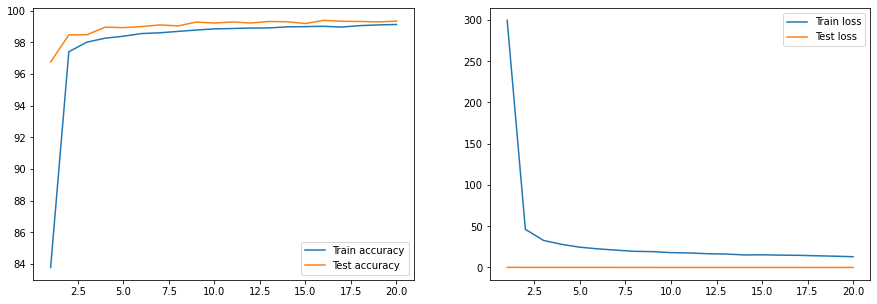

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_10.plot_accuracy()
plt.subplot(122)
model_10.plot_loss()
plt.savefig('images/model_10.png')
plt.show()

In [11]:
max(model_10.train_accuracy), max(model_10.test_accuracy)

(99.12833333333333, 99.39)